# <h1> **PREDICCIÓN PARA HACER POZOS PETROLEROS DE OILYGIGANT** </h1>

## **DESCRIPCIÓN DEL PROYECTO** 

La compañía minera OilyGiant busca encontrar el mejor lugar para un nuevo pozo.
Pasos para elegir la ubicación:
* Recolecta los parámetros del pozo de petróleo en la región seleccionada: calidad del petróleo y volumen de reservas;
* Construye un modelo para predecir el volumen de reservas en los nuevos pozos;
* Selecciona los pozos de petróleo con los valores estimados más altos;
* Elige la región con el mayor beneficio total para los pozos de petróleo seleccionados.


Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping
Descripción de datos


Los datos de exploración geológica de las tres regiones se almacenan en archivos:


* geo_data_0.csv. Descarga el conjunto de datos
* geo_data_1.csv. Descarga el conjunto de datos
* geo_data_2.csv. Descarga el conjunto de datos
* id — identificador único de pozo de petróleo
* f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
* product — volumen de reservas en el pozo de petróleo (miles de barriles).

## **LIBRERÍAS**

In [431]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st


## **PREPROCESAMIENTO DE DATOS** 

Primeramente se importan los datos

In [432]:
try:
  geo0 = pd.read_csv('/content/drive/MyDrive/practicum/Sprint9/geo_data_0.csv')
  geo1 = pd.read_csv('/content/drive/MyDrive/practicum/Sprint9/geo_data_1.csv')
  geo2 = pd.read_csv('/content/drive/MyDrive/practicum/Sprint9/geo_data_2.csv')
except:
  geo0 = pd.read_csv('/datasets/geo_data_0.csv')
  geo2 = pd.read_csv('/datasets/geo_data_1.csv')
  geo2 = pd.read_csv('/datasets/geo_data_2.csv')

Luego se observa el primer DataFrame y que valores contine

In [433]:
geo0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Se buscan valores ausentes o errores en tipos de datos

In [434]:
geo0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Se concluye que para poder realizar el modelo de ML es necesario eliminar la columna de id ya que esta no aporta información relevante a la predicción

In [435]:
geo0_predict = geo0.drop(['id'], axis = 1)
geo0_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


Se repide el mismo procedimeinto con los otros dos DataFrames

In [436]:
geo1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [437]:
geo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [438]:
geo1_predict = geo1.drop(['id'], axis = 1)
geo1_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [439]:
geo2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [440]:
geo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [441]:
geo2_predict = geo2.drop(['id'], axis = 1)
geo2_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


Se procede entonces a entrenar un modelo capaz de predecir la producción que puede tener un determinado pozo prolero según las características f0,f1,f2

## **ALGORITMO DE MACHINE LEARNING**

Primeramente creamos una función que nos permita entrenar el modelo, en este caso, se decidió emplear un modelo de regresión lineal el cual es el único capaz de predecir con maoyor exactitud los valores de los pozos de petroleo

In [442]:
def linear_regressor(df, colum_to_predict, test_s):
  features = df.drop(colum_to_predict, axis = 1)
  target = df[colum_to_predict]

  features_train, features_valid, target_train, target_valid = train_test_split(
      features , target, test_size= test_s, random_state=12345) # segmenta el 25 % de los datos para hacer el conjunto de validación

  model = LinearRegression()
  model.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
  predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación

  result = mean_squared_error(target_valid,predictions_valid)**0.5
  print('El número promedio de reservas previstas es de:', sum(predictions_valid)/len(predictions_valid))
  print( "RECM del modelo de regresión lineal en el conjunto de validación:", result/100)
  return predictions_valid, target_valid,features_valid, model

Aplicamos la función a las 3 regiones y retornamos sus valores de predicción y comprobación, además determiamos cual es el RECM y el promedio de reervas que hay en la distribución

In [443]:
predicted0,target_valid0,features_valid0,model0 = linear_regressor(geo0_predict, 'product', 0.25)

El número promedio de reservas previstas es de: 92.59256778438008
RECM del modelo de regresión lineal en el conjunto de validación: 0.375794217150813


In [444]:
predicted1,target_valid1,features_valid1,model1 = linear_regressor(geo1_predict, 'product', 0.25)

El número promedio de reservas previstas es de: 68.7285468954458
RECM del modelo de regresión lineal en el conjunto de validación: 0.00893099286775617


In [445]:
predicted2,target_valid2,features_valid2,model2 = linear_regressor(geo2_predict, 'product', 0.25)

El número promedio de reservas previstas es de: 94.96504596800506
RECM del modelo de regresión lineal en el conjunto de validación: 0.40029708733934344


Aunque estos vlores por separado parecen ser bastante prometedores, cabe destacar que son modelos diferentes por lo que se procede a calcular el mejor modelo por medio de la comprobación de los mismos según los valores obtenidos anteriomente

In [462]:
features = [features_valid0,features_valid1,features_valid2]
target = [target_valid0,target_valid1,target_valid2]
model = [model0,model1,model2]
for i in range(3):
  for j in range(3):
    predicted = model[i].predict(features[j])
    print(f'Emplemando el modelo model{i} para el feature y target valid {j} tenemos REMC = {round(mean_squared_error(target[j],predicted)**0.5,2)} %')
  print('\n')

Emplemando el modelo model0 para el feature y target valid 0 tenemos REMC = 37.58 %
Emplemando el modelo model0 para el feature y target valid 1 tenemos REMC = 126.95 %
Emplemando el modelo model0 para el feature y target valid 2 tenemos REMC = 47.38 %


Emplemando el modelo model1 para el feature y target valid 0 tenemos REMC = 79.96 %
Emplemando el modelo model1 para el feature y target valid 1 tenemos REMC = 0.89 %
Emplemando el modelo model1 para el feature y target valid 2 tenemos REMC = 87.61 %


Emplemando el modelo model2 para el feature y target valid 0 tenemos REMC = 38.94 %
Emplemando el modelo model2 para el feature y target valid 1 tenemos REMC = 44.95 %
Emplemando el modelo model2 para el feature y target valid 2 tenemos REMC = 40.03 %




In [467]:
predicted0 = model2.predict(features_valid0)
predicted1 = model2.predict(features_valid1)
predicted2 = model2.predict(features_valid2)

### **CONCLUSIÓN INTERMEDIA**

En base a lo obtenido anteriormente se concluye que le mejor modelo para la predicción de los valores es el model2, ya que los otros modelos evidencian ser más volatiles a la hora de predecir, y estos valores son mas cercanos a 0 en norma general, que es lo que se quere, con lo cual se tiene una predicción más fidedigna de los resultados

## **CALCULO DE LAS GANANCIAS**

Primeramente se calcual cual es el volumen mínimo necesario para obtener beneficios en la producción

In [280]:
produc_unit_price = 4500                       #Precio de mil barriles
budget = 100000000                       #Presupuesto para 200 pozos
wells = 200                              #Cantidad de pozos
price_per_well = budget/wells            #Precio promedio de un pozo
products = price_per_well/produc_unit_price    #Volumen de reservas suficiente para desarrollar un nuevo pozo sin pérdidas

print('El volumen de reservas suficientes para desarrollar el pozo sin pérdidas es de:', round(products))

El volumen de reservas suficientes para desarrollar el pozo sin pérdidas es de: 111


Se tiene que se requiere un volumen mínimo de 111 apara poder obtener beneficios

Se procede a ordenar los valores y segmentarlos por todos los que sean mayores a 111 en volumne de producción

In [468]:
predict0 = pd.Series(predicted0).sort_values(ascending = False)
predict0 = predict0[predict0 > products ]
predict0 

14125    166.478513
11584    162.343529
9317     161.260633
23388    158.829140
219      158.393408
            ...    
22157    111.120824
20785    111.120447
12325    111.117670
2101     111.114067
14141    111.111627
Length: 4853, dtype: float64

In [472]:
predict1 = pd.Series(predicted1).sort_values(ascending = False)
predict1 = predict1[predict1 > products ]
predict1

Series([], dtype: float64)

In [470]:
predict2 = pd.Series(predicted2).sort_values(ascending = False)
predict2 = predict2[predict2 > products ]
predict2

22636    165.856833
24690    165.679685
7811     163.439962
1581     162.062589
6751     161.797476
            ...    
3279     111.128243
15707    111.124966
18665    111.118417
2353     111.116703
22672    111.115510
Length: 5234, dtype: float64

Como se puede observar según nuestra predicción la localización ge1 no cuenta con las métricas necesarias para poder generar beneficios, por lo que se procede a eliminarla del estudio

A continuación buscamos los valores en los data frame originales para poder corroorar con el id caules son los puntos de los pozos y se eliminan todos los que sean iguales a 0 para evitar futuros problemas en los cálculos

In [474]:
geo0_presidcted = geo0.loc[predict0.index]
geo0_presidcted  = geo0_presidcted[geo0_presidcted['product'] != 0]

geo1_presidcted = geo1.loc[predict1.index]
geo1_presidcted = geo1_presidcted[geo1_presidcted['product']!= 0]

In [476]:
geo2_presidcted = geo2.loc[predict2.index]
geo2_presidcted = geo2_presidcted[geo2_presidcted['product'] != 0]

Se procede entonces a crear las funiones que nos permite determinar el retorno de la inversión según los ingresos brutos por medio de la inversión y el retorno que generá el pozo a contruir

In [346]:
def profits(product):
  return product * produc_unit_price

def gross_profit(profit):
  return profit - price_per_well 

def gross_profit_margin(profit,gross_profit):
  return (gross_profit/profit) * 100

In [347]:
def profi_table(DF):
  DF['profits'] = list(map(lambda product: profits(product), DF['product']))
  DF['gross_profit'] = list(map(lambda profit: gross_profit(profit), DF['profits']))
  DF['gross_profit_margin'] = list(map(lambda profit,gross_profit: gross_profit_margin(profit,gross_profit), DF['profits'],DF['gross_profit']))
  return DF

Se procede a presentar las tablas con las columnas de beneficios ingreso bruto y margen de ingreso bruto ya constuidas

In [478]:
geo0_predicted = profi_table(geo0_presidcted)
geo0_predicted

,id,f0,f1,f2,product,profits,gross_profit,gross_profit_margin
14125,C8I7q,0.908694,0.876155,5.305020,57.047123,256712.051821,-243287.948179,-94.770754
11584,Nzlvz,-0.925438,0.417638,1.103632,43.091218,193910.481699,-306089.518301,-157.850940
9317,FvQ8l,2.028941,-0.022436,-1.837907,106.926103,481167.464666,-18832.535334,-3.913925
23388,uy1UJ,1.163281,0.525649,-3.309066,26.363999,118637.997385,-381362.002615,-321.450135
219,ZKbRR,-1.009449,0.139620,5.147720,117.675206,529538.429133,29538.429133,5.578146
...,...,...,...,...,...,...,...,...
22157,ABaED,1.795054,-0.159022,5.596923,105.413210,474359.446014,-25640.553986,-5.405301
20785,jCjsk,0.290593,0.822100,1.642992,54.023464,243105.589841,-256894.410159,-105.671947
12325,EvdFl,-0.650990,0.644071,0.628432,76.059805,342269.121829,-157730.878171,-46.083876
2101,o1okC,-0.977625,0.392835,1.351609,66.494056,299223.251100,-200776.748900,-67.099314


In [480]:
geo2_predicted = profi_table(geo2_presidcted)
geo2_predicted

,id,f0,f1,f2,product,profits,gross_profit,gross_profit_margin
22636,LJPET,1.465277,-3.147184,6.994110,32.884988,147982.447518,-352017.552482,-237.877909
24690,zTrp8,0.982777,1.354353,8.074194,128.080040,576360.179318,76360.179318,13.248691
7811,3t5IE,-0.923889,1.838607,1.761442,97.339415,438027.369335,-61972.630665,-14.148118
1581,Dw4Qr,0.114790,-0.025999,0.510266,17.945354,80754.092589,-419245.907411,-519.163666
6751,4XJjd,0.484106,-1.024850,1.677779,82.637809,371870.138295,-128129.861705,-34.455539
...,...,...,...,...,...,...,...,...
3279,o4b5G,-0.584143,-0.521518,7.174042,79.375961,357191.823100,-142808.176900,-39.980808
15707,6g9x4,2.993353,2.197475,5.332101,137.688803,619599.613677,119599.613677,19.302726
18665,v6wLD,-1.488548,-2.780251,2.782762,125.353481,564090.664800,64090.664800,11.361767
2353,YbZQg,-2.270211,1.144119,0.606399,188.846278,849808.250704,349808.250704,41.163198


Ahora estudiaremos por separado como se distribuye la media de los benefcios y la media de los que no nos dan retorno de inversión, los primeros 500 valores

In [484]:
geo0_profits = geo0_predicted[geo0_predicted['gross_profit']>0].sort_values('gross_profit',ascending = False).reset_index(drop = True)[:500]
geo2_profits = geo2_predicted[geo2_predicted['gross_profit']>0].sort_values('gross_profit',ascending = False).reset_index(drop = True)[:500]

In [483]:
geo0_noprofits = geo0_predicted[geo0_predicted['gross_profit']<0].sort_values('gross_profit',ascending = False).reset_index(drop = True)[:500]
geo2_noprofits = geo2_predicted[geo2_predicted['gross_profit']<0].sort_values('gross_profit',ascending = False).reset_index(drop = True)[:500]

Ahora estudiaremos cual es la media de beneficio bruto obtenida por medio del metodo del Bootstrapping utilizando 1000 muestras, para obtener así el intervalo de confianza de cada una de las dos regiones

In [485]:
def Bootstrapping(serie):
  serie = pd.Series(serie)
  state = np.random.RandomState(12345)
  values = []
  for i in range(1000):
      subsample = serie.sample(frac = 10, replace = True, random_state = state)
      q = subsample.mean()
      values.append(q)

  values = pd.Series(values)
  lower = values.quantile(0.025)
  upper = values.quantile(0.975)

  print(f'El intervalo de confianza está entre: ({round(lower,2)} , {round(upper,2)})')


In [486]:
Bootstrapping(geo0_profits['gross_profit'])

El intervalo de confianza está entre: (240854.85 , 243360.29)


La región 0 tiene un media real de beneficio bruto que se encuentra entre 240854.85USD y 243360.29USD

In [487]:
Bootstrapping(geo2_profits['gross_profit'])

El intervalo de confianza está entre: (257273.18 , 259739.84)


La región 2 por otro lado tiene un media real de beneficio bruto que se encuentra entre 257273.18USD y 259739.84USD

Podemos observar que de media, la región 2 tiene una mayor potencial de ingresos, obteneidno un beneficio medio mayor, así mismo se prode a analzar las perdidas

In [400]:
Bootstrapping(geo0_noprofits['gross_profit'])

El intervalo de confianza está entre: (-12594.34 , -11991.05)


En este caso, vemos con la media de las perdias se encutran entre -12594.34USD y -11991.05USD siendo bastante bajas en comparación a los beneficios que se pueden obtener.

In [398]:
Bootstrapping(geo2_noprofits['gross_profit'])

El intervalo de confianza está entre: (-11327.19 , -10855.65)


En este caso, vemos con la media de las perdias se encutran entre -11327.19USD y -10855.65USD siendo una cifra incluso menor a la anterior

Ya se puede ir visualizando cual es la región que mayor ganancias va a generar, sin embargo, aún falta el calculo del riesgo, el cual lo obtendremos mediante el calculo de la probabilidad de ocurrencia de fracasos en la excavación de pozos para una muestra de 1000 pozos, para ello se realizará el cálculo de de una ensayo de distribución binomial

In [405]:
def probabilidad(df):
  failure_rate = df[df['gross_profit_margin']<0].shape[0]/df.shape[0] 
  wells = 1000
  distr = []

  for k in range(0,wells+1):
      choose = factorial(wells ) / (factorial(k)*factorial(wells-k))
      prob = choose * failure_rate**k*(1-failure_rate)**(wells-k)
      distr.append(prob)
  
  # crea un histograma de la distribución de probabilidad
  plt.bar(range(0, wells + 1), distr)

Utilizando la función anterior y la tabla con los valores que predijo el modelo se realiza el cálculo del riesgo de inversión

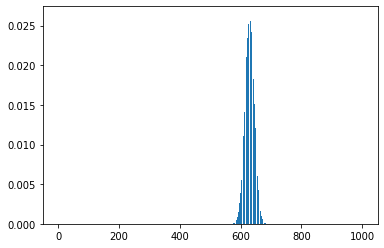

In [488]:
probabilidad(geo0_predicted)

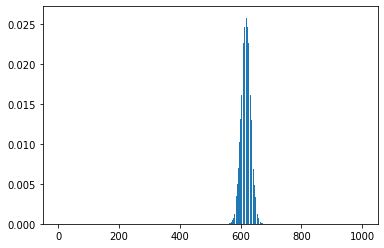

In [489]:
probabilidad(geo2_predicted)

Como se puede observar el riesgo está en torno al 2.5% con distribuciones normales practicamente identicas para cada región. Sin embargo para la región 1 se ividencia una distribución normal con una desviación estandar más cerrada, lo que indica una mayor presición y mnenos desviación en los resultados, además de que la cresta está ligeramente más a la izquierda que la anterior, haciando notar que tiene un margen de error un poco menor que la región 0

Así mismo estudiando la media de los margenes tenemos

In [491]:
Bootstrapping(geo0_profits['gross_profit_margin'])

El intervalo de confianza está entre: (32.27 , 32.49)


In [492]:
Bootstrapping(geo2_profits['gross_profit_margin'])

El intervalo de confianza está entre: (33.76 , 33.96)


La media del margen bruto para los mejores 500 pozos entorno al 32.3% para el caso de la región 0 y del 33.86% para la región 2, pudiendo concluir que esta es la región que se debe seleccionar para la realización de los mismos.

### **CONCLUSIÓN INTERMEDIA**

Como se observa para mabos casos tenemos un máximo edel 2.5% de proobabilidades de que en torno a 600 pozos tengan rendiemintos negativos, aproximadamente el 60% de los casos, sin embargo, observando los beneficios que se pueden obtener en contraposición de las perdidas, podemos concluir que el retorno de la inversión será positivo, y tenemos más de un 40% de acierto con margenes brutos aproximados 33% de retorno de la inversión estando de nuestro lado la probablidad de generar ganancias

## **CONCLUSIÓN GENERAL**

Los datos se encontraban bastante limpios y ordenados, adémas se obtuvo un buen modelo que para 3 casos diferentes consiguió una uniformeidad en sus predicciones con un REMC de entorno al 38% para todos los caso siendo estos valores mas cercanos a 0 en norma general, que es lo que se quere, con lo cual se tiene una predicción más fidedigna de los resultados.

Así mismo el cálculo de los beneficios brutos obtenidos fueron favorables para la región 2, haciendo notar que presenta menos perdidas y mayores ganancias en promedio según el intervalo de confianza, además en el calculo de la probabilidad de perdida del 2.5%, demostró las mismas son un tanto menores para el caso de esta región pudiendo concluir que la sugerencia como mejor elección siendo más rentable para la generación de pozos petoleros sin dudas en la región 2 ya que presenta más ganancias y menos perdidas en promedio además de que el riesgo de perdidas es un tanto menor que el de la región 0 y 1.